In [1]:
import pandas as pd
import pyodbc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
              'Server=LAPTOP-AB644KQI\SQLEXPRESS;'
              'Database=LinkedIn;'
              'Trusted_Connection=yes;')
cursor = conn.cursor()

query='''
SELECT Title,Company, Location, Time_Published, EmploymentType, Industry, Level, JobFunc FROM Filtered_Jobs
'''
LinkedIn_df=pd.read_sql(query,conn)

In [3]:
LinkedIn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           4298 non-null   object        
 1   Company         4298 non-null   object        
 2   Location        4298 non-null   object        
 3   Time_Published  4229 non-null   datetime64[ns]
 4   EmploymentType  2923 non-null   object        
 5   Industry        2922 non-null   object        
 6   Level           4295 non-null   object        
 7   JobFunc         2923 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 268.8+ KB


In [4]:
LI_csv=pd.read_csv('LinkedIn_df.csv')
LI_csv

,Unnamed: 0,Title,Company,SeniorityLevel,Location,Time,Industry,JobFunction,EmploymentType
0,0,Office Manager,StarkWare,Not Applicable,"Netanya, Center District, Israel",2023-02-19 08:22:23+00:00,Software Development,Administrative,Full-time
1,1,Software Dev Engineer Intern,Amazon Web Services (AWS),Not Applicable,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 12:00:55+00:00,"IT Services and IT Consulting, Software Develo...","Information Technology, Consulting, and Engine...",Full-time
2,2,Technical Customer Support,Comeet,Mid-Senior level,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 08:22:23+00:00,Software Development,Information Technology,Full-time
3,3,Junior Brand Manager,Ferrero,Mid-Senior level,"Holon, Tel Aviv District, Israel",2023-02-19 11:51:35+00:00,Manufacturing,Marketing and Sales,Full-time
4,4,Investment Research Analyst,eToro,Mid-Senior level,"Bnei Brak, Tel Aviv District, Israel",2023-02-19 08:25:27+00:00,Financial Services,"Research, Analyst, and Information Technology",Full-time
...,...,...,...,...,...,...,...,...,...
476,476,Sr. Embedded Engineer,CaPow,Full-time,"Beer Sheva, South District, Israel",2023-02-19 09:22:03+00:00,NaN,NaN,NaN
477,477,"מהנדס חומרה לקרונות שליטה במל""טים",Elbit Systems Ltd,Not Applicable,"Haifa, Haifa District, Israel",2023-02-19 11:02:30+00:00,Defense and Space Manufacturing,Other,Full-time
478,478,Senior Malware Anti-Cheat Research Architect,NVIDIA,Mid-Senior level,"Yokneam Ilit, North District, Israel",2023-02-18 18:32:46+00:00,"Computer Hardware Manufacturing, Software Deve...",Engineering,Full-time
479,479,Senior Mac Agent Developer,Proofpoint,Not Applicable,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-18 15:45:27+00:00,Software Development and Computer and Network ...,Sales and Business Development,Full-time


In [5]:
LI_csv['Time']=pd.to_datetime(LI_csv['Time'])
LI_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      481 non-null    int64              
 1   Title           481 non-null    object             
 2   Company         481 non-null    object             
 3   SeniorityLevel  481 non-null    object             
 4   Location        481 non-null    object             
 5   Time            470 non-null    datetime64[ns, UTC]
 6   Industry        271 non-null    object             
 7   JobFunction     271 non-null    object             
 8   EmploymentType  271 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 33.9+ KB


In [6]:
LI_csv.rename(columns={'SeniorityLevel':'Level','Time':'Time_Published','JobFunction':'JobFunc'},inplace=True)


In [7]:
LI_csv.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
LinkedIn_df=pd.concat([LinkedIn_df,LI_csv],ignore_index=True)

In [9]:
LinkedIn_df['Time_Published']=pd.to_datetime(LinkedIn_df['Time_Published'],utc=True)
LinkedIn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4779 entries, 0 to 4778
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Title           4779 non-null   object             
 1   Company         4779 non-null   object             
 2   Location        4779 non-null   object             
 3   Time_Published  4699 non-null   datetime64[ns, UTC]
 4   EmploymentType  3194 non-null   object             
 5   Industry        3193 non-null   object             
 6   Level           4776 non-null   object             
 7   JobFunc         3194 non-null   object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 298.8+ KB


In [10]:
LinkedIn_df.drop_duplicates(inplace=True,ignore_index=True)
LinkedIn_df

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology
1,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None
2,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,None,None,Full-time,None
3,Candidate Recruiter (Junior/Senior Level),ACPS Recruitment,Jerusalem,NaT,None,None,Full-time,None
4,Clinical Coding and Documentation Consultant,Convergence Workforce,Jerusalem,NaT,None,None,Full-time,None
...,...,...,...,...,...,...,...,...
4768,Sr. Embedded Engineer,CaPow,"Beer Sheva, South District, Israel",2023-02-19 09:22:03+00:00,NaN,NaN,Full-time,NaN
4769,"מהנדס חומרה לקרונות שליטה במל""טים",Elbit Systems Ltd,"Haifa, Haifa District, Israel",2023-02-19 11:02:30+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other
4770,Senior Malware Anti-Cheat Research Architect,NVIDIA,"Yokneam Ilit, North District, Israel",2023-02-18 18:32:46+00:00,Full-time,"Computer Hardware Manufacturing, Software Deve...",Mid-Senior level,Engineering
4771,Senior Mac Agent Developer,Proofpoint,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-18 15:45:27+00:00,Full-time,Software Development and Computer and Network ...,Not Applicable,Sales and Business Development


In [11]:
def Location(loc):
    l=loc.split(', ')
    try:
        return l[-2]
    except:
        return l[-1]

In [12]:
LinkedIn_df['District']=LinkedIn_df['Location'].apply(lambda x: Location(x))

In [18]:
for idx,row in LinkedIn_df[LinkedIn_df['District'].str.contains('District|Israel')==False].iterrows():
    LinkedIn_df['District'][idx]=f"{row.Location} District"

C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
LinkedIn_df

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District
1,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District
2,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District
3,Candidate Recruiter (Junior/Senior Level),ACPS Recruitment,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District
4,Clinical Coding and Documentation Consultant,Convergence Workforce,Jerusalem,NaT,None,None,Full-time,None,Jerusalem District
...,...,...,...,...,...,...,...,...,...
4768,Sr. Embedded Engineer,CaPow,"Beer Sheva, South District, Israel",2023-02-19 09:22:03+00:00,NaN,NaN,Full-time,NaN,South District
4769,"מהנדס חומרה לקרונות שליטה במל""טים",Elbit Systems Ltd,"Haifa, Haifa District, Israel",2023-02-19 11:02:30+00:00,Full-time,Defense and Space Manufacturing,Not Applicable,Other,Haifa District
4770,Senior Malware Anti-Cheat Research Architect,NVIDIA,"Yokneam Ilit, North District, Israel",2023-02-18 18:32:46+00:00,Full-time,"Computer Hardware Manufacturing, Software Deve...",Mid-Senior level,Engineering,North District
4771,Senior Mac Agent Developer,Proofpoint,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-18 15:45:27+00:00,Full-time,Software Development and Computer and Network ...,Not Applicable,Sales and Business Development,Tel Aviv District


In [20]:
for index,row in LinkedIn_df[LinkedIn_df['Level'].isin(LinkedIn_df['EmploymentType'].unique())].iterrows():
    LinkedIn_df['EmploymentType'][index]=row.Level
    LinkedIn_df['Level'][index]=np.nan

C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
LinkedIn_df.head()

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District
0,.NET Team Lead,Commit,Jerusalem,NaT,Full-time,Software Development,Mid-Senior level,Information Technology,Jerusalem District
1,Business Intelligence Administrator,Mertens Hoffman - Malam Team,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District
2,Business Intelligence System Analyst,Horizon Technologies LTD.,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District
3,Candidate Recruiter (Junior/Senior Level),ACPS Recruitment,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District
4,Clinical Coding and Documentation Consultant,Convergence Workforce,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District


C:\Users\shiru\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jobs by Districts')

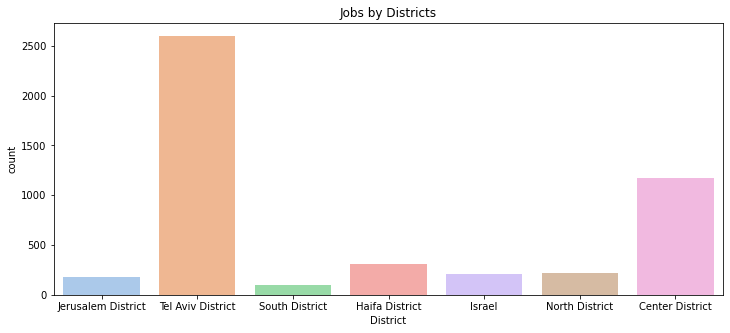

In [23]:
sns.set_style()
plt.figure(figsize=(12,5))
sns.countplot(LinkedIn_df['District'],palette='pastel')
plt.title('Jobs by Districts')

In [24]:
grouped_DisLev=LinkedIn_df.groupby(['District','Level']).count().reset_index()
pivot=grouped_DisLev.pivot(index='District',columns='Level',values='Title')

pivotP=pivot.fillna(0).apply(lambda x: round(x/pivot.sum(axis=1)*100,2))
pivotP

Level,Associate,Director,Entry level,Executive,Mid-Senior level,Not Applicable,Volunteer
District,,,,,,,
Center District,13.55,3.91,14.11,1.82,42.74,23.88,0.00
Haifa District,6.22,0.96,17.70,1.44,33.49,40.19,0.00
Israel,4.76,2.04,25.17,0.68,30.61,36.05,0.68
Jerusalem District,11.39,2.53,30.38,1.27,43.04,11.39,0.00
North District,5.63,2.82,17.61,4.23,35.92,33.80,0.00
South District,9.26,3.70,24.07,0.00,33.33,29.63,0.00
Tel Aviv District,9.77,4.05,15.93,1.22,49.00,20.03,0.00


Text(0.5, 1.0, 'Seniority Level by Disrtict, in %')

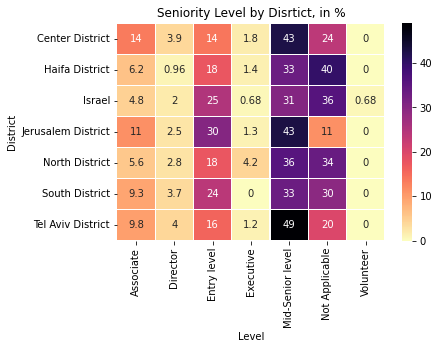

In [25]:
sns.heatmap(pivotP,cmap='magma_r',linecolor='white',linewidth=0.1,annot=True)
plt.title('Seniority Level by Disrtict, in %')

In [26]:
#from datetime import date
LinkedIn_df['DayofWeek']=LinkedIn_df['Time_Published'].dt.day_name()
LinkedIn_df['Hour']=LinkedIn_df['Time_Published'].dt.hour
LinkedIn_df['Date']=LinkedIn_df['Time_Published'].dt.date

C:\Users\shiru\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Jobs by Weekdays')

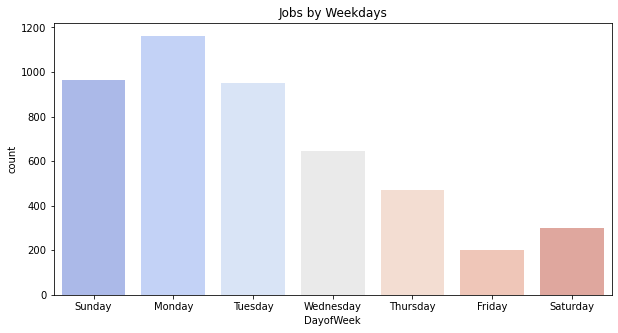

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(LinkedIn_df['DayofWeek'],palette='coolwarm',alpha=0.6)
plt.title('Jobs by Weekdays')

Text(0.5, 0, "['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']")

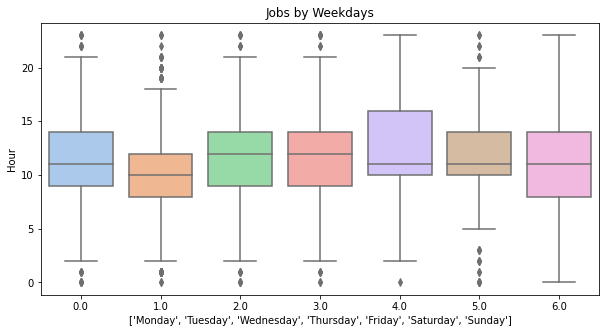

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=LinkedIn_df['Time_Published'].dt.dayofweek,y=LinkedIn_df['Hour'],palette='pastel')
plt.title('Jobs by Weekdays')
plt.xlabel(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Text(0.5, 1.0, 'Jobs by Hours')

<Figure size 720x360 with 0 Axes>

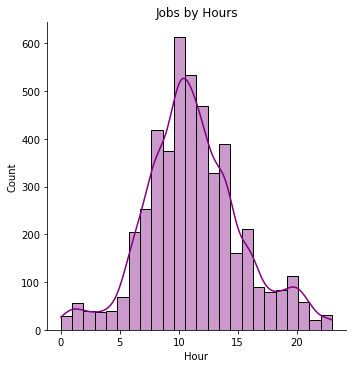

In [29]:
plt.figure(figsize=(10,5))
sns.displot(LinkedIn_df['Hour'],bins=24,palette='pastel',color='purple',kde=True,alpha=0.4)
plt.title('Jobs by Hours')

Text(0.5, 1.0, 'Jobs by Dates')

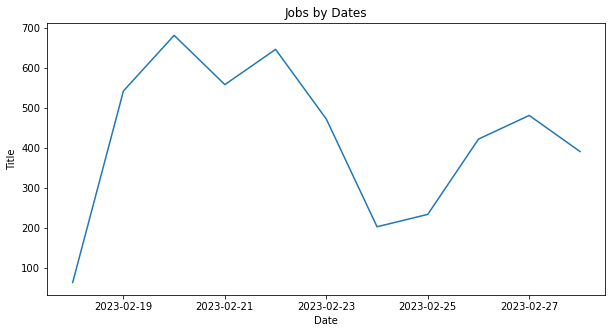

In [30]:
plt.figure(figsize=(10,5))
sns.set_style()
sns.lineplot(data=LinkedIn_df.groupby('Date').count(),x='Date',y='Title')
plt.title('Jobs by Dates')


Text(0.5, 1.0, 'Jobs by Dates')

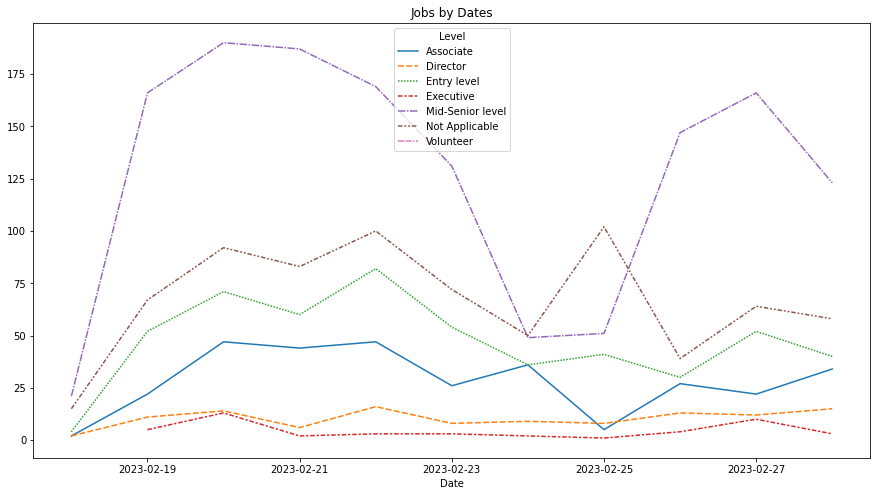

In [31]:
plt.figure(figsize=(15,8))
sns.set_style()
sns.lineplot(data=LinkedIn_df.groupby(['Date','Level']).count().reset_index().pivot('Date','Level','Title'))
plt.title('Jobs by Dates')

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,DayofWeek,Hour,Date
4185,Data Engineer,Gotfriends,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-28 11:06:38+00:00,Full-time,"Software Development, Computer Networking Prod...",Mid-Senior level,Information Technology and Engineering,Tel Aviv District,Tuesday,11.0,2023-02-28
4135,Data Analyst,G-STAT,"Tel Aviv District, Israel",2023-02-28 10:25:33+00:00,Full-time,None,NaN,None,Tel Aviv District,Tuesday,10.0,2023-02-28
4114,Cross Asset Market Data Analyst,ICE,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-28 10:06:09+00:00,Full-time,Financial Services,Not Applicable,"General Business, Information Technology, and ...",Tel Aviv District,Tuesday,10.0,2023-02-28
4070,Data Engineer,Clalit Innovation,"Ramat Gan, Tel Aviv District, Israel",2023-02-28 09:21:36+00:00,Full-time,None,NaN,None,Tel Aviv District,Tuesday,9.0,2023-02-28
4052,Senior Data Engineer,Stealth Startup,"Tel Aviv District, Israel",2023-02-28 08:57:33+00:00,Full-time,None,NaN,None,Tel Aviv District,Tuesday,8.0,2023-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Senior Data Engineer - BI,AI21 Labs,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 08:22:18+00:00,Full-time,Software Development,Not Applicable,Information Technology,Tel Aviv District,Sunday,8.0,2023-02-19
4611,Senior Data Engineer,Tango,"Tel Aviv District, Israel",2023-02-19 00:00:00+00:00,Full-time,Broadcast Media Production and Distribution an...,Mid-Senior level,Information Technology,Tel Aviv District,Sunday,0.0,2023-02-19
8,Data Analyst,comblack,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District,NaN,NaN,NaT
37,Remote Online Data Analyst,TELUS International AI Data Solutions,Jerusalem,NaT,Part-time,IT Services and IT Consulting,Entry level,"Information Technology, Analyst, and Research",Jerusalem District,NaN,NaN,NaT


In [36]:
LinkedIn_df[LinkedIn_df['Title'].str.contains('Full Stack')]

,Title,Company,Location,Time_Published,EmploymentType,Industry,Level,JobFunc,District,DayofWeek,Hour,Date
16,Full Stack Engineer,Flycomm,Jerusalem,NaT,Full-time,None,NaN,None,Jerusalem District,NaN,NaN,NaT
79,Full Stack Engineer,Rise,"Tel Aviv District, Israel",2023-02-19 14:13:43+00:00,Full-time,Advertising Services and Online Audio and Vide...,Mid-Senior level,Engineering,Tel Aviv District,Sunday,14.0,2023-02-19
147,Full Stack Team Leader,Clarity operation services LTD,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 15:56:54+00:00,Full-time,None,NaN,None,Tel Aviv District,Sunday,15.0,2023-02-19
159,Senior Full Stack Developer,bolt,"Petah Tikva, Center District, Israel",2023-02-19 16:45:03+00:00,Full-time,None,NaN,None,Center District,Sunday,16.0,2023-02-19
224,Senior Full Stack Engineer,Fiverr,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-20 03:48:07+00:00,Full-time,"Technology, Information and Internet",Mid-Senior level,Engineering and Information Technology,Tel Aviv District,Monday,3.0,2023-02-20
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,Full Stack Engineer,ConKor Systems Ltd.,"Haifa District, Israel",2023-02-19 09:24:14+00:00,Full-time,Software Development,Entry level,Engineering and Information Technology,Haifa District,Sunday,9.0,2023-02-19
4653,Full Stack Engineer,Ethosia,"Tel Aviv District, Israel",2023-02-19 06:49:25+00:00,Full-time,"Software Development, Computer and Network Sec...",Mid-Senior level,"Research, Science, and Engineering",Tel Aviv District,Sunday,6.0,2023-02-19
4683,Full Stack Developer,Ethosia,"Haifa, Haifa District, Israel",2023-02-19 06:51:47+00:00,Full-time,"Software Development, Technology, Information ...",Mid-Senior level,"Research, Science, and Engineering",Haifa District,Sunday,6.0,2023-02-19
4684,Experienced Full Stack Engineer,Via,"Tel Aviv-Yafo, Tel Aviv District, Israel",2023-02-19 11:29:51+00:00,Full-time,Software Development,Mid-Senior level,Engineering and Information Technology,Tel Aviv District,Sunday,11.0,2023-02-19


In [1]:
LinkedIn_df['Location'].unique()

NameError: name 'LinkedIn_df' is not defined